In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
fraud = pd.read_csv(r"C:\Users\SHIVA KUMAR\Desktop\Assigmnt\DT\Fraud_check.csv")

In [144]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [145]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [146]:
fraud[fraud.duplicated()].values

array([], shape=(0, 6), dtype=object)

In [147]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

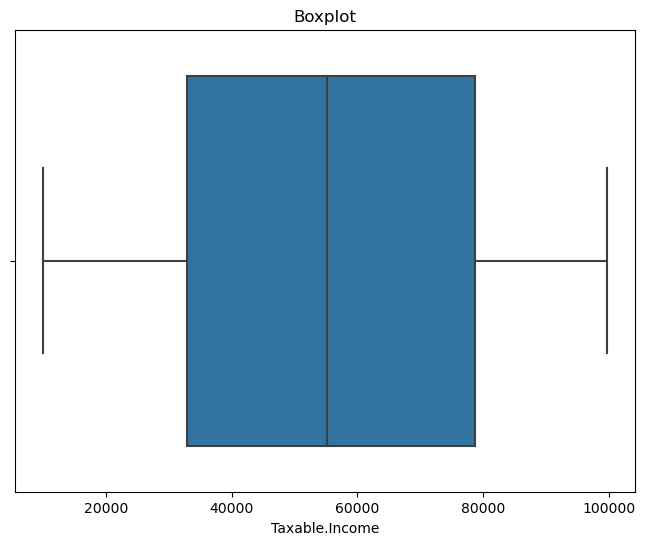

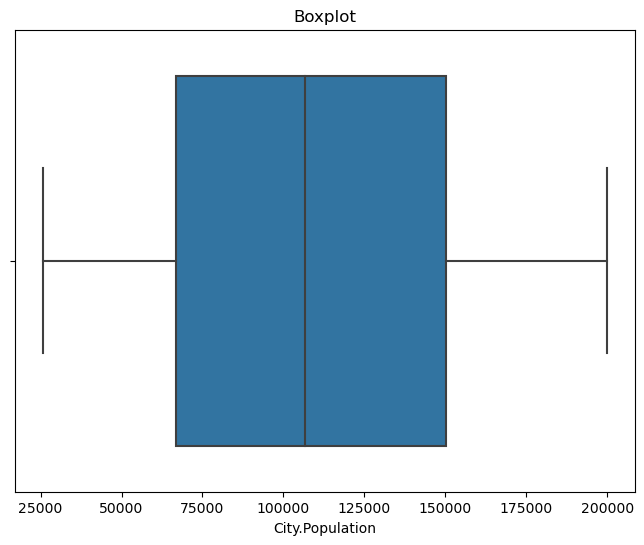

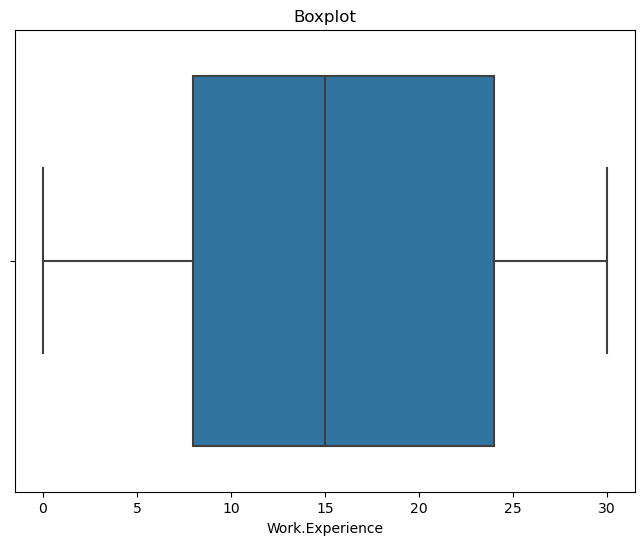

In [148]:
#EDA

data=["Taxable.Income","City.Population","Work.Experience"]
for column in data:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=fraud[column])
  plt.title("Boxplot")
  plt.show()

In [149]:
import pandas as pd

# Assuming df is your DataFrame with the dataset
# If not, load your dataset into a DataFrame

# Define a function to categorize taxable_income
def categorize_taxable_income(income):
    if income <= 30000:
        return 'Risky'
    else:
        return 'Good'

# Apply the function to create a new column 'Income_Category'
fraud['Income_Category'] = fraud['Taxable.Income'].apply(categorize_taxable_income)

# Drop the original 'Taxable.Income' column if you no longer need it
fraud = fraud.drop(columns=['Taxable.Income'])

# Display the modified DataFrame
print(fraud)


    Undergrad Marital.Status  City.Population  Work.Experience Urban  \
0          NO         Single            50047               10   YES   
1         YES       Divorced           134075               18   YES   
2          NO        Married           160205               30   YES   
3         YES         Single           193264               15   YES   
4          NO        Married            27533               28    NO   
..        ...            ...              ...              ...   ...   
595       YES       Divorced            39492                7   YES   
596       YES       Divorced            55369                2   YES   
597        NO       Divorced           154058                0   YES   
598       YES        Married           180083               17    NO   
599        NO       Divorced           158137               16    NO   

    Income_Category  
0              Good  
1              Good  
2              Good  
3              Good  
4              Good  
.. 

In [150]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [151]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income_Category
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [152]:
fraud.corr()

C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_16628\2870714847.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fraud.corr()


,City.Population,Work.Experience
City.Population,1.000000,0.013135
Work.Experience,0.013135,1.000000


In [153]:
df_SS = fraud.iloc[:,[2,3,5]]
df_SS

,City.Population,Work.Experience,Income_Category
0,50047,10,Good
1,134075,18,Good
2,160205,30,Good
3,193264,15,Good
4,27533,28,Good
...,...,...,...
595,39492,7,Good
596,55369,2,Good
597,154058,0,Good
598,180083,17,Good


In [154]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [155]:
df_LE = fraud.iloc[:,[0,1,4]]
df_LE


,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO
...,...,...,...
595,YES,Divorced,YES
596,YES,Divorced,YES
597,NO,Divorced,YES
598,YES,Married,NO


In [156]:
for i in range(df_LE.shape[1]):
    df_LE.iloc[:,i] = LE.fit_transform(df_LE.iloc[:,i])

C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_16628\2314953831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LE.iloc[:,i] = LE.fit_transform(df_LE.iloc[:,i])
C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_16628\2314953831.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_LE.iloc[:,i] = LE.fit_transform(df_LE.iloc[:,i])
C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_16628\2314953831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [157]:
df_LE

,Undergrad,Marital.Status,Urban
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0
...,...,...,...
595,1,0,1
596,1,0,1
597,0,0,1
598,1,1,0


In [158]:
fraud_data = pd.concat([df_SS,df_LE],axis = 1)
fraud_data


,City.Population,Work.Experience,Income_Category,Undergrad,Marital.Status,Urban
0,50047,10,Good,0,2,1
1,134075,18,Good,1,0,1
2,160205,30,Good,0,1,1
3,193264,15,Good,1,2,1
4,27533,28,Good,0,1,0
...,...,...,...,...,...,...
595,39492,7,Good,1,0,1
596,55369,2,Good,1,0,1
597,154058,0,Good,0,0,1
598,180083,17,Good,1,1,0


In [159]:
Y = fraud_data["Income_Category"]
X = fraud_data.iloc[:,[0,1,3,4,5]]
X

,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,50047,10,0,2,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,2,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [160]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [161]:
X_train.shape,X_test.shape

((420, 5), (180, 5))

In [162]:
X_train

,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
325,25779,16,0,2,1
553,26884,13,0,2,1
582,32907,12,1,1,1
488,76718,10,1,2,1
496,59382,5,1,0,1
...,...,...,...,...,...
218,38091,19,0,1,0
223,192297,17,1,1,1
271,183682,20,0,2,0
474,80729,0,1,0,0


# Model building

In [163]:
#creating the model of Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [164]:
#fitting the model

model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [165]:
Y_Pred = model.predict(X_test)

In [166]:
Y_Pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [167]:
from sklearn.metrics import classification_report

In [168]:
print(classification_report(Y_test,Y_Pred))  #on testing data accuracy is 98%

              precision    recall  f1-score   support

        Good       0.79      1.00      0.88       142
       Risky       0.00      0.00      0.00        38

    accuracy                           0.79       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.62      0.79      0.70       180



C:\Users\SHIVA KUMAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHIVA KUMAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHIVA KUMAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
model.score(X_train,Y_train) # on training data accuracy is 99%

0.7976190476190477

In [170]:
from sklearn import tree

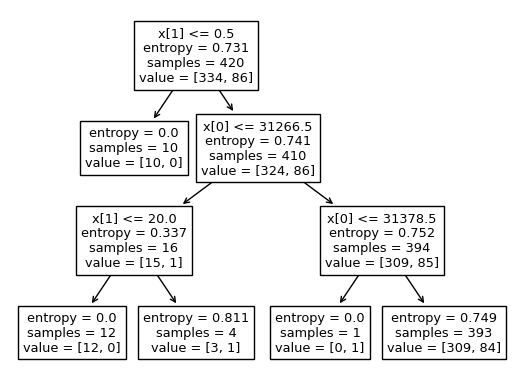

In [171]:
tree.plot_tree(model) #model is created on training data so sampels are 280
plt.show()

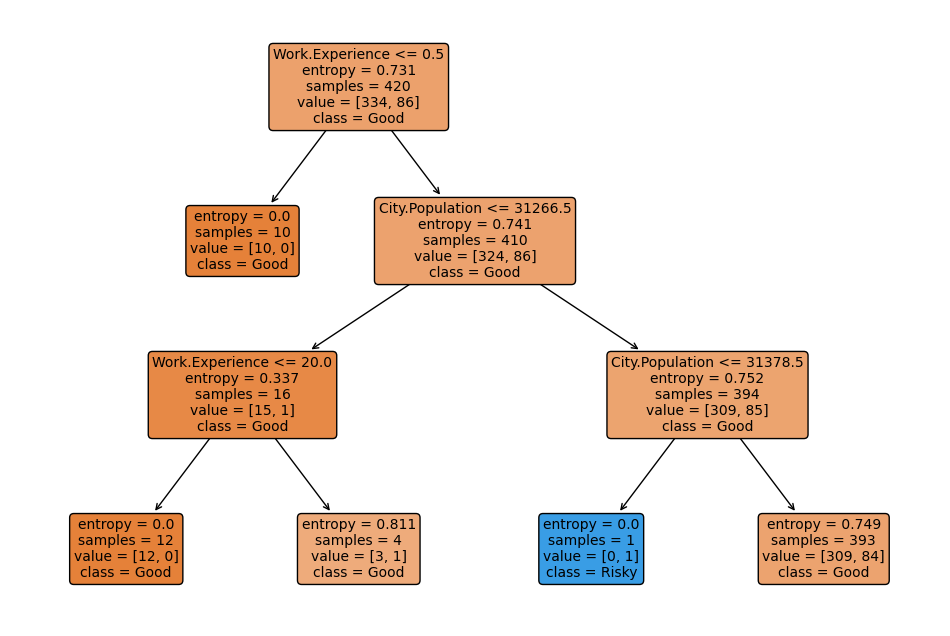

In [172]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_classifier is your trained decision tree model
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=Y.unique().tolist(), rounded=True, fontsize=10)
plt.show()


In [175]:
##Predictions on train data
prediction = model.predict(X_train)

In [177]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_train,prediction)
accuracy

0.7976190476190477